# Analyzing text similarities in Metadecidim dataset

Analysis of the Metadecidim dataset. The aim of this report is to analyze similarities between proposals and actions. An action is a cluster of similar proposals. Proposals have been written by the city council, organizations or the general public.

We have obtained the doc2vec embedding of each proposal or action text by calculating the mean of all word2vec of the words that appear in the text, both in Catalan and in Spanish. After that, we have computed text similarity between proposals and actions text by applying several distance functions of the doc2vecs (cosinus, euclidean, minkonswki and manhattan).

## Sanity check

The first step is to check if distance functions obtain correlated values.

In [56]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py

pd.set_option('display.max_columns', 50)

# set dir
os.chdir("G:\Mi unidad\UPF")
path_to_files = os.getcwd() + "\data"

# import dataset
data = pd.read_csv(path_to_files + "\proposals_actions_similiarity_2_clean.csv", sep=",", header=0)
data.head(5)

,Unnamed: 0,id,origin,scope,district,category,subcategory,title,description,author_id,author_name,created_at,votes,comments,url,status,description_es,description_ca,title_es,title_ca,action_id,text_ca,text_es,row_order,cos_dist_ca,eucl_dist_ca,mink_dist_ca,manh_dist_ca,cos_dist_es,eucl_dist_es,mink_dist_es,manh_dist_es
0,0,3158,citizenship,district,Horta - Guinardó,Bon viure,Educació i coneixement,Institut al barri d'Horta.,Inici del procediment per a la construcció d'u...,512,Solidaritat Catalana per la Independència,2/19/2016,373,17,https://decidim.barcelona.cat/proposals/instit...,accepted,Inicio del procedimiento para la construcción ...,Inici del Procediment per a la construcció d'1...,Instituto en el barrio de Horta.,Institut al barri d'Horta.,5061,Institut al barri d'Horta.. Inici del Procedim...,Instituto en el barrio de Horta.. Inicio del p...,0,0.43,16.69,4.09,55.95,0.86,60.42,7.77,107.38
1,1,6774,citizenship,district,Gràcia,Transició ecològica,Urbanisme per als barris,Reformar el carrer Verdi a l'entorn del Mercat...,"El carrer Verdi, del mercat en amunt, actua co...",15153,Xavier Sisternas,3/24/2016,7,0,https://decidim.barcelona.cat/proposals/reform...,accepted,"La calle Verdi, del mercado para arriba, actúa...","El carrer Verdi, del mercat en amunt, actua co...",Reformar la calle Verdi en el entorno del Merc...,Reformar el carrer Verdi a l'entorn del Mercat...,2717,Reformar el carrer Verdi a l'entorn del Mercat...,Reformar la calle Verdi en el entorno del Merc...,1,0.58,17.80,4.22,58.03,0.90,63.32,7.96,110.14
2,2,1691,citizenship,district,Sarrià - Sant Gervasi,Transició ecològica,Energia i canvi climàtic,Planta de compostatge als barris de la muntany...,La recollida verda als barris de la muntanya e...,4466,salvaferran,02/10/2016,70,2,https://decidim.barcelona.cat/proposals/planta...,accepted,La recogida verde en los barrios de la montaña...,La Recollida verda als barris de la muntanya é...,Planta de compostaje en los barrios de la mont...,Planta de compostatge als barris de la muntany...,5437,Planta de compostatge als barris de la muntany...,Planta de compostaje en los barrios de la mont...,2,0.34,7.52,2.74,36.79,0.43,10.27,3.21,45.10
3,3,5179,organization,city,NaN,Economia plural,Ocupació de qualitat,Elevar el niverll academic als joves professio...,Molts joves amb determinades i diferents exper...,6285,NaN,3/15/2016,1,0,https://decidim.barcelona.cat/proposals/elevar...,accepted,Muchos jóvenes con determinadas y diferentes e...,MOLTS joves amb DETERMINADES i Diferents exper...,Elevar el niverll académico a los jóvenes prof...,Elevar el niverll academic ALS joves professio...,5641,Elevar el niverll academic ALS joves professio...,Elevar el niverll académico a los jóvenes prof...,3,0.34,11.14,3.34,46.64,1.02,37.25,6.10,85.30
4,4,810,official,district,Sant Andreu,Economia plural,Turisme sostenible,Rutes guiades per Sant Andreu,Oferir visites guiades per donar a conèixer el...,1,Ajuntament de Barcelona,1/29/2016,20,2,https://decidim.barcelona.cat/proposals/rutes-...,accepted,Ofrecer visitas guiadas para dar a conocer los...,Oferir visites guiades per donar a Conèixer a ...,Rutas guiadas por San Andrés,Rutes guiades per Sant Andreu,5511,Rutes guiades per Sant Andreu. Oferir visites ...,Rutas guiadas por San Andrés. Ofrecer visitas ...,4,0.02,0.75,0.87,11.97,0.81,29.33,5.42,75.95


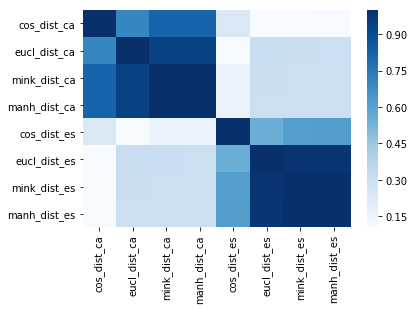

In [23]:
# calculate the correlation matrix
corr = data[data.columns[24:32]].corr()

# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="Blues")

## Ranking of the most modified proposals

We analyze those proposals that have changed the most with respect to their actions. We also compare their distances taking account the language and the origin of the proposal's author (Catalan or Spanish).

In [ ]:
 data.sort_values('cos_dist_ca', ascending = False).head(10)

,Unnamed: 0,id,origin,scope,district,category,subcategory,title,description,author_id,author_name,created_at,votes,comments,url,status,description_es,description_ca,title_es,title_ca,action_id,text_ca,text_es,row_order,cos_dist_ca,eucl_dist_ca,mink_dist_ca,manh_dist_ca,cos_dist_es,eucl_dist_es,mink_dist_es,manh_dist_es,ajuntament_dummy
3721,3721,3440,citizenship,district,Sant Martí,Transició ecològica,Mobilitat sostenible,Eliminar carril bici sobre la vorera a c. Salv...,Eliminar carril bici sobre la vorera a c. Salv...,8311,AVV Vila Olímpica,2/25/2016,3,0,https://decidim.barcelona.cat/proposals/elimin...,accepted,Eliminar carril bici sobre la acera a c. Salva...,Eliminar carril bici sobre la vorera a c. Salv...,Eliminar carril bici sobre la acera a c. Salva...,Eliminar carril bici sobre la vorera a c. Salv...,5289,Eliminar carril bici sobre la vorera a c. Salv...,Eliminar carril bici sobre la acera a c. Salva...,3721,1.11,31.99,5.66,77.51,0.93,53.74,7.33,103.82,0
331,331,8778,meeting,city,NaN,Economia plural,Turisme sostenible,Modificacions legals que endureixin les sancio...,"Modificar la sanció per reiteració, que aquest...",9263,Suport decidim Activitat Econòmica,04/06/2016,0,0,https://decidim.barcelona.cat/proposals/modifi...,accepted,"Modificar la sanción por reiteración, que esta...","Modificar la Sanció per reiteració, que AQUEST...",Modificaciones legales que endurezcan las sanc...,Modificacions legals que endureixin els Sancio...,5906,Modificacions legals que endureixin els Sancio...,Modificaciones legales que endurezcan las sanc...,331,1.09,30.00,5.48,75.40,0.95,31.25,5.59,78.23,0
140,140,6312,meeting,district,Eixample,Economia plural,Turisme sostenible,Lluita contra pràctiques indegudes/il·lícites/...,Lluita contra pràctiques indegudes/il·lícites/...,9283,eixampledelibera,3/21/2016,6,0,https://decidim.barcelona.cat/proposals/lluita...,accepted,Lucha contra prácticas indebidas / ilícitas / ...,Lluita contra Pràctiques indegudes / il·lícite...,Lucha contra prácticas indebidas / ilícitas / ...,Lluita contra Pràctiques indegudes / il·lícite...,5906,Lluita contra Pràctiques indegudes / il·lícite...,Lucha contra prácticas indebidas / ilícitas / ...,140,1.08,99.41,9.97,137.06,1.20,68.74,8.29,117.09,0
3257,3257,2078,organization,district,Ciutat Vella,Transició ecològica,Urbanisme per als barris,Equipaments,Obertura antiga comissaria del Passeig Joan de...,4990,AAVV Barceloneta,02/12/2016,9,1,https://decidim.barcelona.cat/proposals/equipa...,accepted,Apertura antigua comisaría del Paseo Juan de B...,Obertura antiga Comissaria del Passeig Joan de...,equipamientos,Equipaments,6498,Equipaments. Obertura antiga Comissaria del Pa...,equipamientos. Apertura antigua comisaría del ...,3257,1.08,48.29,6.95,95.97,0.67,33.69,5.80,80.11,0
3765,3765,8054,meeting,city,NaN,Bon viure,Convivència i seguretat,Derogar l’ordenança de civisme,Derogar l'actual ordenança de civisme de la ci...,9267,Suport Ciutat Vella,04/04/2016,0,4,https://decidim.barcelona.cat/proposals/deroga...,accepted,Derogar la actual ordenanza de civismo de la c...,Derogar l'actual ordenança de civisme de la ci...,Derogar la ordenanza de civismo,Derogar l'ordenança de civisme,5623,Derogar l'ordenança de civisme. Derogar l'actu...,Derogar la ordenanza de civismo. Derogar la ac...,3765,1.07,139.96,11.83,157.86,0.96,47.30,6.88,95.13,0
5475,5475,5966,citizenship,district,Les Corts,Transició ecològica,Mobilitat sostenible,carril bici,Mes carril bici.,9289,suport decidim.HG i Les Corts,3/18/2016,2,1,https://decidim.barcelona.cat/proposals/carril...,accepted,Mes carril bici.,Mes carril bici.,carril bici,carril bici,6029,carril bici. Mes carril bici.,carril bici. Mes carril bici.,5475,1.05,221.96,14.90,203.82,1.06,50.44,7.10,99.25,0
6115,6115,9116,meeting,district,Eixample,Transició ecològica,Urbanisme per als barris,Campanyes de sensibilització sobre les superilles,Fer més pedagogía i campanyes de senibilitzaci...,9283,eixampledelibera,04/07/2016,1,1,https://decidim.barcelona.ca

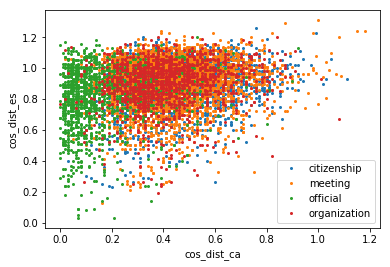

In [39]:
groups = data.groupby('origin')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.cos_dist_ca, group.cos_dist_es, marker='o', linestyle='', ms=2, label=name)
ax.legend()
ax.set_xlabel("cos_dist_ca")
ax.set_ylabel("cos_dist_es")

plt.show()

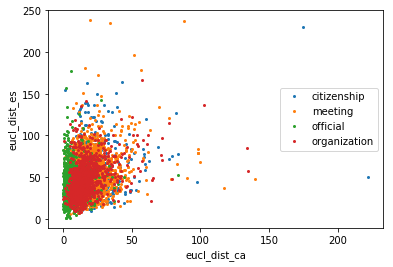

In [42]:
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.eucl_dist_ca, group.eucl_dist_es, marker='o', linestyle='', ms=2, label=name)
ax.legend()
ax.set_xlabel("eucl_dist_ca")
ax.set_ylabel("eucl_dist_es")

plt.show()

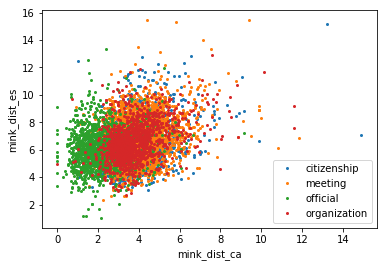

In [43]:
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.mink_dist_ca, group.mink_dist_es, marker='o', linestyle='', ms=2, label=name)
ax.legend()
ax.set_xlabel("mink_dist_ca")
ax.set_ylabel("mink_dist_es")

plt.show()

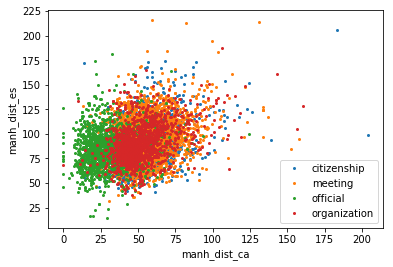

In [44]:
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.manh_dist_ca, group.manh_dist_es, marker='o', linestyle='', ms=2, label=name)
ax.legend()
ax.set_xlabel("manh_dist_ca")
ax.set_ylabel("manh_dist_es")

plt.show()

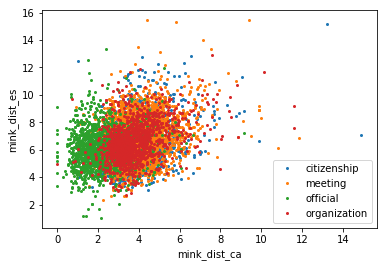

In [101]:
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.mink_dist_ca, group.mink_dist_es, marker='o', linestyle='', ms=2, label=name)
ax.legend()
ax.set_xlabel("mink_dist_ca")
ax.set_ylabel("mink_dist_es")

plt.show()

## Similarities between the proposals of the city council and the citizens

We want to analyze if the texts of actions are closer to the texts of councils or citizens proposals.

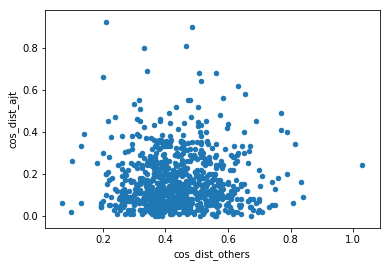

In [115]:
data['ajuntament_dummy'] =  np.where(data['author_name'] == 'Ajuntament de Barcelona', 1, 0)

# delete actions with no 'Ajuntament de Barcelona' as author in any proposals
data = data.groupby('action_id').filter(lambda df: (df.author_name == 'Ajuntament de Barcelona').any())

# delete actions with only one proposals
data = data.groupby('action_id').filter(lambda df: (len(df)) > 1)

data_ajt = data.loc[data['ajuntament_dummy'] == 1]
data_ajt = data_ajt.groupby(['action_id']).cos_dist_ca.mean().reset_index()
data_ajt.columns.values[1] = "cos_dist_ajt"

data_others = data.loc[data['ajuntament_dummy'] == 0]
data_others = data_others.groupby(['action_id']).cos_dist_ca.mean().reset_index()
data_others.columns.values[1] = "cos_dist_others"

data_mean = pd.merge(data_ajt, data_others)

# plots
data_mean.plot(kind='scatter', x='cos_dist_others', y='cos_dist_ajt')

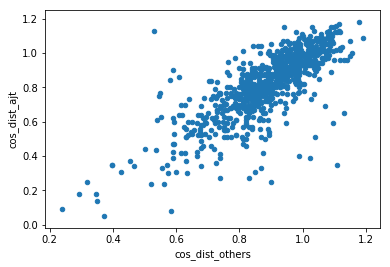

In [114]:
data['ajuntament_dummy'] =  np.where(data['author_name'] == 'Ajuntament de Barcelona', 1, 0)

# delete actions with no 'Ajuntament de Barcelona' as author in any proposals
data = data.groupby('action_id').filter(lambda df: (df.author_name == 'Ajuntament de Barcelona').any())

# delete actions with only one proposals
data = data.groupby('action_id').filter(lambda df: (len(df)) > 1)

data_ajt = data.loc[data['ajuntament_dummy'] == 1]
data_ajt = data_ajt.groupby(['action_id']).cos_dist_es.mean().reset_index()
data_ajt.columns.values[1] = "cos_dist_ajt"

data_others = data.loc[data['ajuntament_dummy'] == 0]
data_others = data_others.groupby(['action_id']).cos_dist_es.mean().reset_index()
data_others.columns.values[1] = "cos_dist_others"

data_mean = pd.merge(data_ajt, data_others)

# plots
ax = data_mean.plot(kind='scatter', x='cos_dist_others', y='cos_dist_ajt')

def annotate_df(row):  
    ax.annotate(row.name, row.values,
                xytext=(10,-5), 
                textcoords='offset points',
                size=18, 
                color='darkslategrey')

ab= data_mean.apply(annotate_df, axis=1)

plt.show()